In [2]:
import pandas as pd

In [50]:
CELLID = 'CellID'
CLUSTER = 'Cluster'
dataset = 'exemplar-001'
# load in data
fastPG = pd.read_csv(f'~/Harvard/mcmicro/{dataset}/cell-states/fastpg/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)
scanpy = pd.read_csv(f'~/Harvard/mcmicro/{dataset}//cell-states/scanpy/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)
flowSOM = pd.read_csv(f'~/Harvard/mcmicro/{dataset}//cell-states/flowsom/unmicst-{dataset}-cells.csv', delimiter=',', index_col=CELLID)

In [51]:
cluster_table = pd.DataFrame()
cluster_table['fastPG'] = fastPG[CLUSTER]
cluster_table['scanpy'] = scanpy[CLUSTER]
cluster_table['flowSOM'] = flowSOM[CLUSTER]
cluster_table

,fastPG,scanpy,flowSOM
CellID,,,
1,1,6,15
2,13,4,79
3,0,19,2
4,6,12,16
5,13,1,82
...,...,...,...
9543,0,5,33
9544,0,19,1
9545,0,19,1


In [52]:
cluster_table = cluster_table[cluster_table.duplicated(keep=False)]
cluster_table

,fastPG,scanpy,flowSOM
CellID,,,
1,1,6,15
2,13,4,79
3,0,19,2
4,6,12,16
5,13,1,82
...,...,...,...
9543,0,5,33
9544,0,19,1
9545,0,19,1


In [53]:
cluster_table.columns

Index(['fastPG', 'scanpy', 'flowSOM'], dtype='object')

In [55]:
clusters_all = cluster_table.groupby(list(cluster_table.columns), as_index=False).groups
len(clusters_all)

373

In [44]:
clusters_all_sorted = sorted(clusters_all, key=lambda k: len(clusters_all[k]), reverse=True)

In [46]:
num_cells_per_cluster = []
for cells in clusters_all.values():
    num_cells_per_cluster.append(len(cells))

(array([211.,  10.,   4.,   5.,   2.,   2.,   0.,   0.,   1.,   2.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([2.0000e+00, 2.2850e+02, 4.5500e+02, 6.8150e+02, 9.0800e+02,
        1.1345e+03, 1.3610e+03, 1.5875e+03, 1.8140e+03, 2.0405e+03,
        2.2670e+03, 2.4935e+03, 2.7200e+03, 2.9465e+03, 3.1730e+03,
        3.3995e+03, 3.6260e+03, 3.8525e+03, 4.0790e+03, 4.3055e+03,
        4.5320e+03]),
 <BarContainer object of 20 artists>)

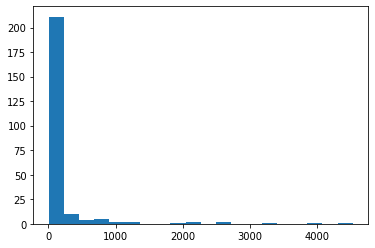

In [48]:
# plot cluster sizes
import matplotlib.pyplot as plt
plt.hist(num_cells_per_cluster, bins=20)